In [227]:
import numpy as np
import pandas as pd

import highlight_text
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from adjustText import adjust_text
import matplotlib.font_manager as fm

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [7]:
SPOTIPY_CLIENT_ID = ''
SPOTIPY_CLIENT_SECRET = ''

In [ ]:
swift_uri = 'spotify:artist:06HL4z0CvFAxyc27GXpf02'
spotify = (spotipy
           .Spotify(
               client_credentials_manager=SpotifyClientCredentials(
                   client_id=SPOTIPY_CLIENT_ID,
                   client_secret=SPOTIPY_CLIENT_SECRET
                   )
               )
           )

In [27]:
swift_albums = {
    
    'Taylor Swift':'7mzrIsaAjnXihW3InKjlC3',
    'Fearless':'2dqn5yOQWdyGwOpOIi9O4x',
    'Speak Now':'5MfAxS5zz8MlfROjGQVXhy',
    'Red':'1EoDsNmgTLtmwe1BDAVxV5',
    '1989':'2QJmrSgbdM35R67eoGQo4j',
    'Reputation':'6DEjYFkNZh67HP7R9PSZvv',
    'Lover':'1NAmidJlEaVgA3MpcPFYGq',
    'folklore':'0xS0iOtxQRoJvfcFcJA5Gv',
    'evermore':'2Xoteh7uEpea4TohMxjtaq'
    
    }

In [59]:
songs = dict()

for i,j in zip(list(swift_albums.values()),list(swift_albums.keys())):
  results = spotify.album_tracks(i)
  tracks = results['items']
  while results['next']:
      results = spotify.next(results)
      tracks.extend(results['items'])

  for track in tracks:
    songs[f"{track['name']}"] = track['uri']

  print(f'{j} completed...')

print('Done!')

Taylor Swift completed...
Fearless completed...
Speak Now completed...
Red completed...
1989 completed...
Reputation completed...
Lover completed...
folklore completed...
evermore completed...
Done!


In [71]:
# because I made the dict backwards lol oops
songs = {v:k for k,v in songs.items()}

In [ ]:
songs_df = pd.DataFrame()
for i in songs.keys():
  i_features = spotify.audio_features(i)
  songs_df = songs_df.append(i_features)

songs_df.reset_index(inplace=True)

In [78]:
songs_df['title'] = songs_df.uri.map(songs)

In [266]:
t5 = [
      'Cold As You',
      'White Horse',
      'All You Had To Do Was Stay',
      'Delicate',
      'The Archer',
      'my tears ricochet',
      'tolerate it',
      'Dear John',
      'All Too Well'
      ]

songs_df['track5'] = np.where(
    songs_df.title.isin(t5),1,0
    )

In [267]:
text = (songs_df
         .loc[
              ((songs_df.tempo < 75) |
              (songs_df.tempo > 180) |
              (songs_df.valence < 0.16) |
              (songs_df.valence > 0.75) |
              (songs_df.track5 == 1)) &
              ~(songs_df.title.isin(['So It Goes...',"Mary's Song (Oh My My My)"]))
              ]
         )

In [ ]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
fm.fontManager.ttflist += fm.createFontList(['thsarabunnew-webfont.ttf'])
mpl.rc('font', family='TH Sarabun New')

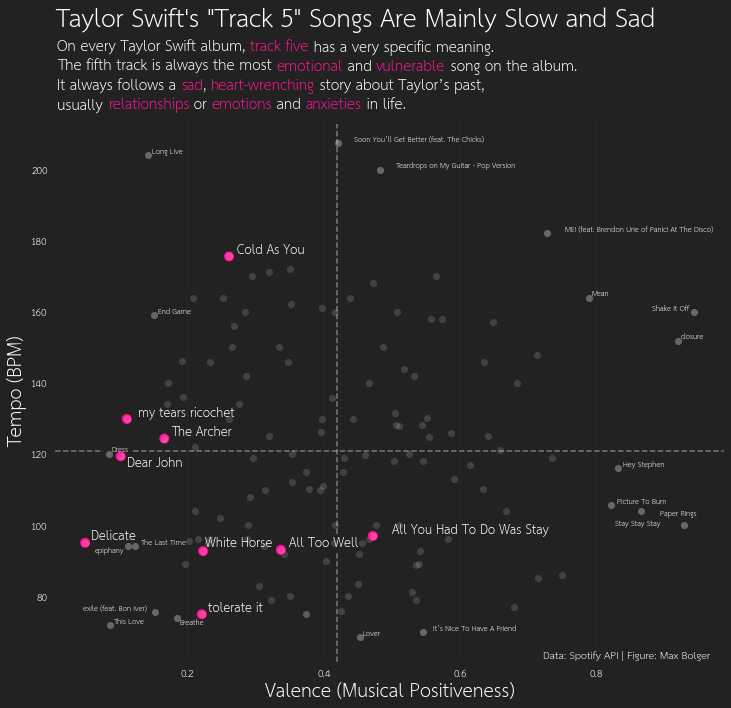

In [269]:
fig, ax = plt.subplots(figsize=(12,10),facecolor='#222222',edgecolor='#222222')

ax.set_facecolor("#222222")

(sns
 .scatterplot(
     x='valence',
     y='tempo',
     data=songs_df.loc[songs_df.track5==0],
     color='white',
     linewidth=0,
     alpha=0.15,
     s=50)
 )

(sns
 .scatterplot(
     x='valence',
     y='tempo',
     data=songs_df.loc[songs_df.track5==1],
     color='deeppink',
     edgecolor='none',
     s=100)
 )

(sns
 .scatterplot(
     x='valence',
     y='tempo',
     data=text,
     color='white',
     linewidth=0,
     alpha=0.2,
     s=50)
 )

texts1 = [plt.text(x0,y0,name,ha='right',va='bottom',color='white',fontsize=12) for x0,y0,name in zip(
    text.loc[text.track5==1].valence, text.loc[text.track5==1].tempo, text.loc[text.track5==1].title)]

texts2 = [plt.text(x0,y0,name,ha='right',va='bottom',color='white',fontsize=7) for x0,y0,name in zip(
    text.loc[text.track5==0].valence, text.loc[text.track5==0].tempo, text.loc[text.track5==0].title)]

adjust_text(texts1+texts2,expand_points=(1.25, 1.05))

ax.axvline(x=songs_df.valence.mean(),ymin=0,ymax=.2,linestyle='--',color='white',alpha=0.4,zorder=0)
ax.axvline(x=songs_df.valence.mean(),ymin=.235,ymax=.99,linestyle='--',color='white',alpha=0.4,zorder=0)
ax.axhline(y=songs_df.tempo.mean(),xmin=0,xmax=.0725,linestyle='--',color='white',alpha=0.4,zorder=0)
ax.axhline(y=songs_df.tempo.mean(),xmin=.1175,xmax=1,linestyle='--',color='white',alpha=0.4,zorder=0)


plt.title('''Taylor Swift's "Track 5" Songs Are Mainly Slow and Sad\n\n\n''',color='white',fontsize=24,loc='left')
plt.xlabel('Valence (Musical Positiveness)',color='white',fontsize=18)
plt.ylabel('Tempo (BPM)',color='white',fontsize=18)

plt.figtext(0.69,0.13,"Data: Spotify API | Figure: Max Bolger",color='white')

highlight_text.fig_text(x=0.128,y=.99,
            s="On every Taylor Swift album, <track five> has a very specific meaning.\n" \
            "The fifth track is always the most <emotional> and <vulnerable> song on the album.\n" \
            "It always follows a <sad>, <heart-wrenching> story about Taylor’s past,\n" \
            "usually <relationships> or <emotions> and <anxieties> in life.",
            color='white',fontsize=14,
            highlight_textprops=[{"color": 'deeppink'},
                                 {"color": 'deeppink'},
                                 {"color": 'deeppink'},
                                 {"color": 'deeppink'},
                                 {"color": 'deeppink'},
                                 {"color": 'deeppink'},
                                 {"color": 'deeppink'},
                                 {"color": 'deeppink'}],
              ax=ax
              )

for i in ['left','right','top','bottom']:
  ax.spines[i].set_visible(False)

ax.grid(zorder=0,alpha=.04)

plt.tick_params(left=False)
plt.tick_params(bottom=False)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.savefig('wk3_track5.png',dpi=300,bbox_inches='tight',facecolor=fig.get_facecolor())